Weather app - to do:

1. Adjust date formatting for pasturl in weatherapp() function. X
2. Implement Pandas to create a df from this data X
3. Allow for plotting of this data X
4. Allow for creating average daily values, rather than hourly X

In [102]:
#Decides whether or not it is past or future data
def forecast_or_past():
    
    choice = input("Forecast or historical?: ")
    
    while choice.lower() not in ['forecast','historical']:
        print("Invalid response.\n")
        choice = input("Forecast or historical?: ")

    return choice.lower()

#Selects location and adjusts longitude and latitude based on this
def location_selection():
    
    choice = input('I want to view the weather in...')
    
    while choice.title() not in location_options.keys():
        print("Invalid response.\n")
        choice = input('I want to view the weather in...')

    return choice.title()

#Selects features for URL
def forecastfeatures():

    #List of variables to view
    hours_vars = []

    #Instructions
    print('Which of the following features do you want to see?\n\n1.Temperature 2.Humidity 3.Cloud cover 4.Precipitation\n')

    selecting = True

    #While loop
    while selecting:
        var_selection = input('Which features do you want to view? Write done when you are finished: ')

        if var_selection.lower() == 'done':
            break

        elif var_selection.lower() in hours_vars_dictionary.keys() and var_selection.lower() not in hours_vars:
            hours_vars.append(hours_vars_dictionary[var_selection.lower()])
            print(hours_vars)

        else:
            print('Choose a valid item. \n') 
                
    #Joined list of variables for API   
    joined_hours_vars = ','.join(hours_vars)

    return joined_hours_vars

#Selects how many days for forecast
def forecastlength():
    
    length = input('Select a length of forecast between 1 and 16 days\n')

    selecting = True
    
    while selecting:

        if length.isdigit() == False:
            length = input('Please enter a number between 1 and 16')
        elif int(length) > 16 or int(length) < 1:
            length = input('Please enter a number between 1 and 16')
        else:
            break

    return length

#Defines features for url.
def historicalfeatures():
    
    hours_vars = []
    
    #Instructions
    print('Which of the following features do you want to see?\n\n1.Temperature 2.Humidity 3.Cloud cover 4.Rainfall\n')
    
    selecting = True
    
    #While loop
    while selecting:
        var_selection = input('Which features do you want to view? Write done when you are finished: ')
    
        if var_selection.lower() == 'done':
            break
    
        elif var_selection.lower() in hours_vars_dictionary.keys() and var_selection.lower() not in hours_vars:
            hours_vars.append(hours_vars_dictionary[var_selection.lower()])
            print(hours_vars)
    
        else:
            print('Choose a valid item. \n') 
                    
    #Joined list of variables for API   
    joined_hours_vars = ','.join(hours_vars)
    
    return joined_hours_vars

#Defines the start date of the search.
def historical_startdate():

    date = []

    selecting = True

    year = input('What year do you want to start from?: ')
    
    while selecting:

        if int(year) < 2022 or int(year) > 2025: 
            year = input('Please select a year between 2022 and 2025')
        elif len(year) != 4:
            year = input('Please enter a 4-digit number for year')
        elif year.isdigit() == False:
            year = input('Please enter a 4-digit number for year')
        else:
            date.append(year)
            break

    month = input('What month do you want to start from?: ')
    
    while selecting:

        if int(month) < 1 or int(month) > 12: 
            year = input('Please select a month between 01 and 12')
        elif month.isdigit() == False:
            month = input('Please enter a 2-digit number for month')
        elif len(month) != 2:
            month = input('Please enter a 2-digit number for month')
        else:
            date.append(month)
            break

    day = input('What day do you want to start from?: ')
    
    while selecting:

        if int(day) < 1 or int(day) > 31: 
            year = input('Please select a day between 01 and 31')
        elif day.isdigit() == False:
            day = input('Please enter a 2-digit number for day')
        elif len(day) != 2:
            day = input('Please enter a 2-digit number for day')
        else:
            date.append(day)
            break

    return '-'.join(date)

#Defines the end date of the URL.
def historical_enddate():
    
    date = []

    selecting = True

    year = input('What year do you want to end at?: ')
    
    while selecting:

        if int(year) < 2022 or int(year) > 2025: 
            year = input('Please select a year between 2022 and 2025')
        elif len(year) != 4:
            year = input('Please enter a 4-digit number for year')
        elif year.isdigit() == False:
            year = input('Please enter a 4-digit number for year')
        else:
            date.append(year)
            break

    month = input('What month do you want to end at?: ')
    
    while selecting:

        if int(month) < 1 or int(month) > 12: 
            year = input('Please select a month between 01 and 12')
        elif month.isdigit() == False:
            month = input('Please enter a 2-digit number for month')
        elif len(month) != 2:
            month = input('Please enter a 2-digit number for month')
        else:
            date.append(month)
            break

    day = input('What day do you want to end at?: ')
    
    while selecting:

        if int(day) < 1 or int(day) > 31: 
            year = input('Please select a day between 01 and 31')
        elif day.isdigit() == False:
            day = input('Please enter a 2-digit number for day')
        elif len(day) != 2:
            day = input('Please enter a 2-digit number for day')
        else:
            date.append(day)
            break

    return '-'.join(date)

In [112]:
def url_to_df(url):

    import requests
    import pandas
    from IPython.display import display
    import matplotlib.pyplot as plt

    #Make GET request
    response = requests.get(url)
    data = response.json()

    #Save the variables to use in the pandas df
    df_dict = {'Time': data['hourly']['time']}
    
    if 'temperature_2m' in featureslist:
        df_dict["Temperature (°C)"] = data['hourly']['temperature_2m']
    if 'relative_humidity_2m' in featureslist:
        df_dict["Humidity (%)"] = data['hourly']['relative_humidity_2m']
    if 'cloud_cover' in featureslist:        
        df_dict["Cloud Cover (%)"] = data['hourly']['cloud_cover']
    if 'precipitation_probability' in featureslist:
        df_dict["Precipitation chance (%)"] = data['hourly']['precipitation_probability']
    if 'precipitation' in featureslist:
        df_dict["Rainfall (mm)"] = data['hourly']['precipitation']

    #Create dataframe ----- How to make these situational
    df = pandas.DataFrame(df_dict)

    #Convert the 'Time' series to a datatime data type for readability.
    df["Time"] = pandas.to_datetime(df["Time"])

    #Daily or hourly data? 
    print('Do you want hourly data or averages for each day?')
    answer = input('Daily or Hourly?')
    while answer.lower() not in ['daily','hourly']:
        answer = input('Answer Daily or Hourly.')

    if answer.lower() == 'daily':
    
        df.set_index("Time", inplace=True)  # Ensure 'Time' is the index
        daily_avg_df = df.resample("D").mean().reset_index()  # Compute daily averages and reset index
        display(daily_avg_df)

        #Plotting
        plot_or_not = input("Do you want to plot this data on a chart? Y/N: ")
        while plot_or_not.lower() not in ['y','n']:
            plot_or_not = input('Respond with Y or N: ')

        if plot_or_not.lower() == 'n':
            return 'Thank you for using our service. Goodbye.'

        else: 
            var_count = input('Do you want to plot all variables, or just temperature? All/Temperature: ')
            while var_count.lower() not in ['all','temperature']:
                var_count = plot_or_not = input('Respond with all or temperature: ')

            #To plot all variables on a graph
            
            if var_count.lower() == 'all':
                
                daily_avg_df["Time"] = pandas.to_datetime(daily_avg_df["Time"])
                daily_avg_df.set_index("Time", inplace=True)
                
                plt.figure(figsize=(12, 6))

                variables = [col for col in daily_avg_df.columns if col != 'Time']
                
                for column in variables:   
                    plt.plot(daily_avg_df.index, daily_avg_df[column], label=column)
                
                plt.xlabel("Date")
                plt.ylabel("Values")
                plt.title("Weather Trends Over Time")
                plt.legend()
                plt.xticks(rotation=45)
                plt.grid(True)
                
                plt.show()

            #To plot a single variable on a graph
            else:
                plt.figure(figsize=(12, 6))
                plt.plot(daily_avg_df["Time"], daily_avg_df["Temperature (°C)"], marker='o', linestyle='-')
                
                # Formatting
                plt.xlabel("Date")
                plt.ylabel("Temperature (°C)")
                plt.title("Daily Average Temperature Over Time")
                plt.xticks(rotation=45)
                plt.grid(True)
                
                plt.show()

    else:
        display(df)
        
    #Plotting
        plot_or_not = input("Do you want to plot this data on a chart? Y/N: ")
        while plot_or_not.lower() not in ['y','n']:
            plot_or_not = input('Respond with Y or N: ')

        if plot_or_not.lower() == 'n':
            return 'Thank you for using our service. Goodbye.'

        else: 
            var_count = input('Do you want to plot all variables, or just temperature? All/Temperature: ')
            while var_count.lower() not in ['all','temperature']:
                var_count = plot_or_not = input('Respond with all or temperature: ')

            #To plot all variables on a graph
            
            if var_count.lower() == 'all':

                df["Time"] = pandas.to_datetime(df["Time"])
                df.set_index("Time", inplace=True)
                
                plt.figure(figsize=(12, 6))

                variables = [col for col in df.columns if col != 'Time']
                
                for column in variables:   
                    plt.plot(df.index, df[column], label=column)
                
                plt.xlabel("Date")
                plt.ylabel("Values")
                plt.title("Weather Trends Over Time")
                plt.legend()
                plt.xticks(rotation=45)
                plt.grid(True)
                
                plt.show()

            #To plot a single variable on a graph
            else:
                plt.figure(figsize=(12, 6))
                plt.plot(df["Time"], df["Temperature (°C)"], marker='o', linestyle='-')
                
                # Formatting
                plt.xlabel("Date")
                plt.ylabel("Temperature (°C)")
                plt.title("Daily Average Temperature Over Time")
                plt.xticks(rotation=45)
                plt.grid(True)
                
                plt.show()

In [110]:
#URL creating function
def weatherapp():

    #Welcome message
    print('Welcome to the weather app\n\nWould you like to view past weather data or a forecast for the future data?\n')

    #Returns 'forecast' or 'historical' in lower case
    type_selection = forecast_or_past()
    
    #Location selection
    print('Where would you like to view the weather of?\n\nYour options are: London, New York, Tokyo, Paris, and Sydney\n')

    #Returns .title() city
    location = location_selection()

    #Adjust latitude and longitude to match location
    lat,long = location_options[location]

    #Generature Forecast URL

    if type_selection == 'forecast':
        
        features = forecastfeatures()
         
        global featureslist
        featureslist = features.split(',')
        
        days = forecastlength()
        
        url = f"https://api.open-meteo.com/v1/forecast?latitude={lat}&longitude={long}&hourly={features}&forecast_days={days}"
        
        url_to_df(url)

    #Generate Historical URL

    elif type_selection == 'historical':

        features = historicalfeatures()
        
        featureslist = features.split(',')

        startdate = historical_startdate()

        enddate = historical_enddate()

        url = f'https://historical-forecast-api.open-meteo.com/v1/forecast?latitude={lat}&longitude={long}&start_date={startdate}&end_date={enddate}&hourly={features}'

        url_to_df(url)

    else:
        return 'Error occured. Please try again.'

Welcome to the weather app

Would you like to view past weather data or a forecast for the future data?



Forecast or historical?:  forecast


Where would you like to view the weather of?

Your options are: London, New York, Tokyo, Paris, and Sydney



I want to view the weather in... tokyo


Which of the following features do you want to see?

1.Temperature 2.Humidity 3.Cloud cover 4.Precipitation



Which features do you want to view? Write done when you are finished:  temperature


['temperature_2m']


Which features do you want to view? Write done when you are finished:  humidity


['temperature_2m', 'relative_humidity_2m']


Which features do you want to view? Write done when you are finished:  cloud cover


['temperature_2m', 'relative_humidity_2m', 'cloud_cover']


Which features do you want to view? Write done when you are finished:  done
Select a length of forecast between 1 and 16 days
 16


Do you want hourly data or averages for each day?


Daily or Hourly? daily


,Time,Temperature (°C),Humidity (%),Cloud Cover (%)
0,2025-03-09,6.395833,52.500000,8.500000
1,2025-03-10,7.000000,59.333333,12.125000
2,2025-03-11,10.275000,74.541667,18.541667
3,2025-03-12,14.916667,84.083333,89.000000
4,2025-03-13,11.237500,50.041667,86.250000
5,2025-03-14,11.045833,45.666667,62.416667
6,2025-03-15,7.950000,79.583333,100.000000
7,2025-03-16,9.925000,74.041667,99.458333
8,2025-03-17,8.883333,41.833333,73.916667
9,2025-03-18,7.479167,52.000000,53.083333


Do you want to plot this data on a chart? Y/N:  y
Do you want to plot all variables, or just temperature? All/Temperature:  all


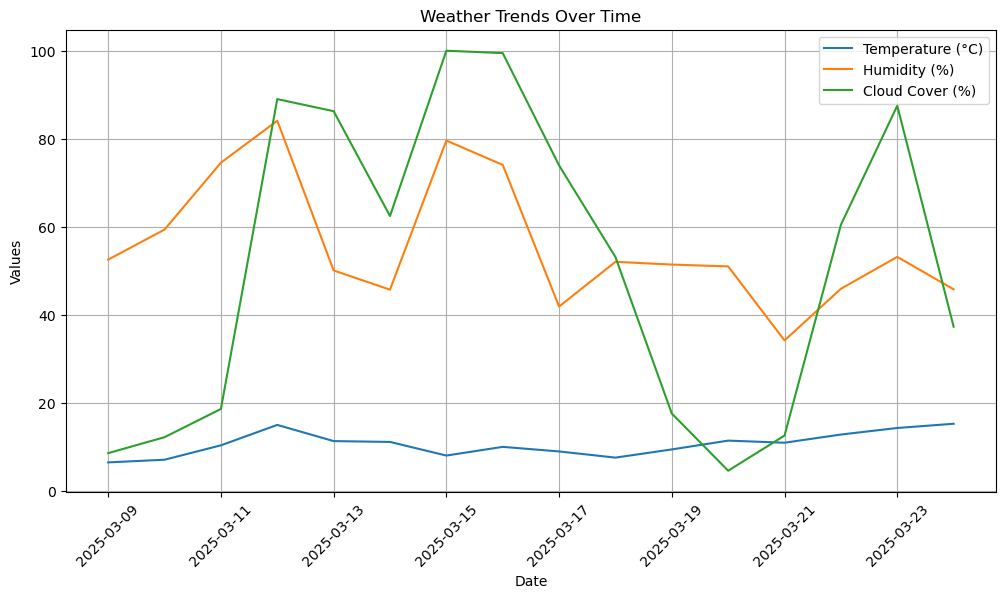

In [111]:
weatherapp()